In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/shared_overview.csv')

In [46]:
df["soc_per_km"] = df["SOC"] / df["Distance [km]"]

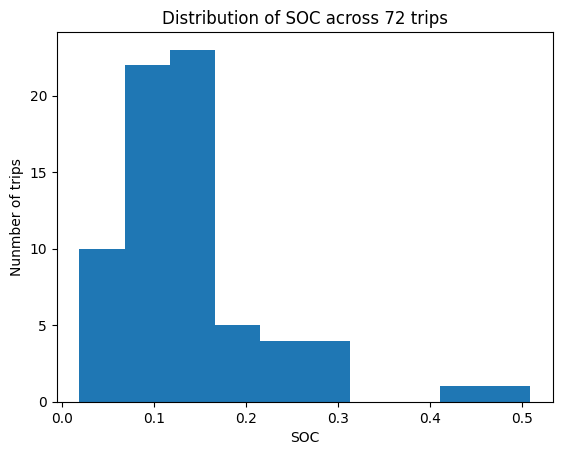

In [52]:
plt.hist(df["SOC"])
plt.xlabel("SOC")
plt.ylabel("Nunmber of trips")
plt.title("Distribution of SOC across 72 trips")
plt.show()

The chart above shows that the variable of interest, SOC, has a quite amount of variations allowing us to conduct a prediction exercise using features available in the data.

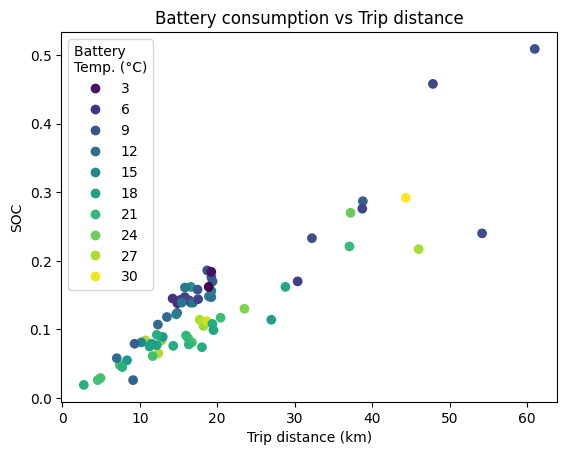

In [48]:
fig, ax = plt.subplots()

scatter = ax.scatter(df["Distance [km]"], df["SOC"], c=df["Mean Battery Temperature [°C]"])

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Battery \nTemp. (°C)")
plt.xlabel("Trip distance (km)")
plt.ylabel("SOC")
plt.title("Battery consumption vs Trip distance")
plt.show()

The chart above shows a linear relationship between distance and battery consumtpion as expected. Each additional milage travelled requires a similar amount of energy (if all else being equal), implying a constant value of SOC per kilometer (SOC/km). This is consistent with our earlier finding that the linear model performs better than tree models in the prediction analysis and distance is the most important feature (0.92 feature importance).

Furthermore, in the chart, there seem to be two different sets of trips with a different value of SOC/km. The trips associated with higher SOC/km, indicated by darker circles, tend to have lower mean battery temperature. This result suggests that trips with a lower temperature would require more battery consumption to travel same amount of distance. To further confirm this finding, we plot SOC/km against mean battery temperature in the chart below. There is a significantly negative correlation between the two variables.

The strong correlation between SOC/km and temperature is also consistent with our finding that temperature is one of the most important features (besides distance) to predict SOC.

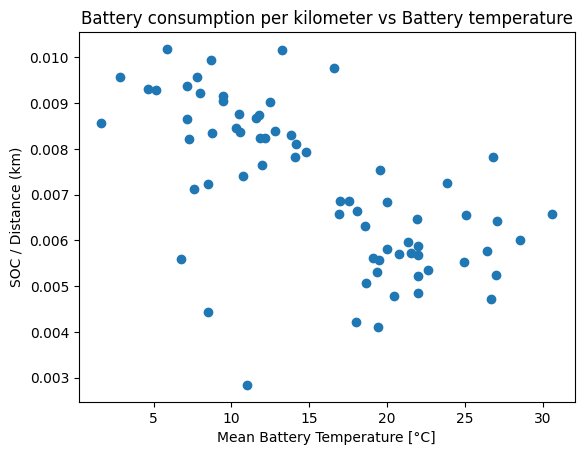

In [49]:
plt.scatter(df["Mean Battery Temperature [°C]"], df["soc_per_km"])
plt.xlabel("Mean Battery Temperature [°C]")
plt.ylabel("SOC / Distance (km)")
plt.title("Battery consumption per kilometer vs Battery temperature")
plt.show()

Finally, the duration of a trip should also be an important factor to determine SOC. However, our feature importance analysis from trees suggests that the importance of duration is at most 0.02. This is because the distance and duration are highly correlated, and distance has already captured most of the correlation between SOC and distance/duration and has an importance of more than 0.92.

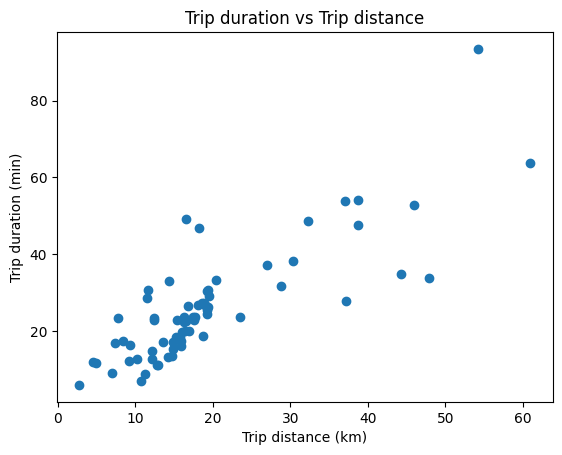

In [50]:
plt.scatter(df["Distance [km]"], df["Duration [min]"])
plt.xlabel("Trip distance (km)")
plt.ylabel("Trip duration (min)")
plt.title("Trip duration vs Trip distance")
plt.show()